In [ ]:
!pip install pytube3

from pytube import YouTube


In [ ]:
!pip install google-api-python-client


In [36]:
from googleapiclient.discovery import build

def get_video_comments_youtube_api(video_id, api_key):
    youtube = build('youtube', 'v3', developerKey=api_key)
    response = youtube.commentThreads().list(
        part='snippet',
        videoId=video_id,
        textFormat='plainText'
    ).execute()

    comments = []
    for item in response['items']:
        comment = item['snippet']['topLevelComment']['snippet']['textDisplay']
        comments.append(comment)

    return comments


In [46]:
video_id = 'LcWFedjaR4Q'
api_key = 'API-KEY'
comments = get_video_comments_youtube_api(video_id, api_key)
print(comments)


["Can I start with this course if I haven't done mathematics for Machine Learning?", 'one of best ml,dl youtube channel🙌👌...', 'for this i have to pay 1lakh rupees ...you saved me', 'i found this course after a lot of search , it was not recommended me on searching by youtube', '5:37:02\nFixing Error:\nannot=True does not mean adding CRIM ZN etc\nannot=True means adding those correlation numerical values on the squares\n\nIf annot=False, then no numerical values will be added on the squares', 'Can you please do a video tutorial on neural architecture search!', 'I stopped at 06:03:13', 'Thank you so much for this wonderful tutorial which covers all the topics.Appreciating your effort .👏👏', 'can i use vs-code for machine learning..?', 'Thanku so much for your efforts.', 'thank you /\\', '7:41:30', 'amazing sir, what a playlist..any beginner can go with this...on point content. Thankyou.', "Completed the first video 😊 really greatfull for your efforts and dedication. I didn't learned ever

In [38]:
!pip install nltk


In [39]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

def analyze_sentiment(comment):
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(comment)
    compound_score = scores['compound']

    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

def get_sentiments(comments):
    sentiments = [analyze_sentiment(comment) for comment in comments]
    return sentiments



sentiments = get_sentiments(comments)
print(sentiments)


['Neutral', 'Positive', 'Positive', 'Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Positive', 'Positive', 'Positive', 'Positive', 'Positive', 'Neutral', 'Positive', 'Positive']


In [ ]:
def get_overall_sentiment(sentiments):
    positive_count = sentiments.count('Positive')
    negative_count = sentiments.count('Negative')
    neutral_count = sentiments.count('Neutral')

    total = len(sentiments)

    positive_percentage = (positive_count / total) * 100
    negative_percentage = (negative_count / total) * 100
    neutral_percentage = (neutral_count / total) * 100

    if positive_percentage > negative_percentage and positive_percentage > neutral_percentage:
        return 'Overall Sentiment: Positive'
    elif negative_percentage > positive_percentage and negative_percentage > neutral_percentage:
        return 'Overall Sentiment: Negative'
    else:
        return 'Overall Sentiment: Neutral'


overall_sentiment = get_overall_sentiment(sentiments)
print(overall_sentiment)


Overall Sentiment: Positive


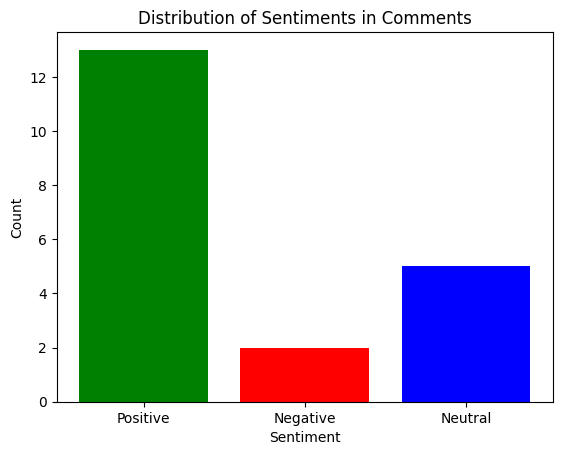

In [ ]:
import matplotlib.pyplot as plt

def visualize_sentiments(sentiments):
    labels = ['Positive', 'Negative', 'Neutral']
    counts = [sentiments.count('Positive'), sentiments.count('Negative'), sentiments.count('Neutral')]

    plt.bar(labels, counts, color=['green', 'red', 'blue'])
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Distribution of Sentiments in Comments')
    plt.show()


visualize_sentiments(sentiments)


# **Metrics**

In [ ]:
from googleapiclient.discovery import build

def get_video_engagement(video_id, api_key):
    youtube = build('youtube', 'v3', developerKey=api_key)
    response = youtube.videos().list(
        part='statistics',
        id=video_id
    ).execute()

    statistics = response['items'][0]['statistics'
    likes = int(statistics.get('likeCount', 0))
    dislikes = int(statistics.get('dislikeCount', 0))
    views = int(statistics.get('viewCount', 0))
    comment_count = int(statistics.get('commentCount', 0))

    return likes, dislikes, views, comment_count

video_id = 'LcWFedjaR4Q'
api_key = 'API-KEY'
likes, dislikes, views, comment_count = get_video_engagement(video_id, api_key)
likes , dislikes , views , comment_count = get_video_engagement(video_id , api_key)
print(f'Likes: {likes}, Dislikes: {dislikes}, Views: {views}, Comment Count: {comment_count}')


Likes: 4516, Dislikes: 0, Views: 198997, Comment Count: 180


# Non-English **comments**

In [35]:
!pip install textblob


In [ ]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 7.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=03c981ccb93d9105012431bfe53cdc8d37a49b802d58fdbb5a65366f77e87574
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [40]:
from langdetect import detect
from textblob import TextBlob

def detect_language(comment):
    try:
        language = detect(comment)
    except:
        language = 'unknown'
    return language

def analyze_sentiment_multilingual(comment):
    blob = TextBlob(comment)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

def analyze_sentiment_with_language(comments):
    sentiments = []
    for comment in comments:
        language = detect_language(comment)
        if language == 'en':
            sentiment = analyze_sentiment(comment)
        else:
            sentiment = analyze_sentiment_multilingual(comment)
        sentiments.append(sentiment)
    return sentiments



sentiments = analyze_sentiment_with_language(comments)
print(sentiments)


['Positive', 'Neutral', 'Positive', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Positive', 'Positive', 'Positive', 'Neutral', 'Neutral', 'Positive', 'Neutral', 'Neutral']


In [43]:
import pandas as pd

def create_sentiment_dataframe(comments, sentiments):
    df = pd.DataFrame({'Comment': comments, 'Sentiment': sentiments})
    return df

In [47]:
sentiments = analyze_sentiment_with_language(comments)

df = create_sentiment_dataframe(comments, sentiments)
print(df)

                                              Comment Sentiment
0   Can I start with this course if I haven't done...   Neutral
1              one of best ml,dl youtube channel🙌👌...  Positive
2   for this i have to pay 1lakh rupees ...you sav...  Positive
3   i found this course after a lot of search , it...  Negative
4   5:37:02\nFixing Error:\nannot=True does not me...  Positive
5   Can you please do a video tutorial on neural a...  Positive
6                               I stopped at 06:03:13  Negative
7   Thank you so much for this wonderful tutorial ...  Positive
8           can i use vs-code for machine learning..?   Neutral
9                    Thanku so much for your efforts.   Neutral
10                                       thank you /\  Positive
11                                            7:41:30   Neutral
12  amazing sir, what a playlist..any beginner can...  Positive
13  Completed the first video 😊 really greatfull f...  Positive
14  Boston dataset is not available anym

In [48]:
negative_comments = df[df['Sentiment'] == 'Negative']
print(negative_comments)


                                             Comment Sentiment
3  i found this course after a lot of search , it...  Negative
6                              I stopped at 06:03:13  Negative


In [50]:
def find_comment_by_phrase(comments, phrase):
    for comment in comments:
        if comment.startswith(phrase):
            return comment
    return None



phrase_to_find = "I stopped at 06:"
comment_found = find_comment_by_phrase(comments, phrase_to_find)
if comment_found:
    print("Comment found:", comment_found)
else:
    print("No comment found with the specified phrase.")


Comment found: I stopped at 06:03:13
